# **ATIVIDADE 2**


---



---



# **Bibliotecas**

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import pylab as pl

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Regressão Logística - Gradiente Descendente**

---






In [ ]:
class RLGD():
  def __init__(self, alpha=0.0001, epoca=1500):
    
    self._estimator_type = "classifier"    
    self.alpha= alpha
    self.epoca= epoca
    self.beta= np.array([])
        
  def calculo(self, x, y):
    
    y_predicted = self.predict(x[:,1:])
    erro = y - y_predicted
    n = x.shape[1]
    
    for i in range(n):
      self.beta[i] += (self.alpha * np.mean(erro * x[:, i])/n)
            
  def fit(self, x, y):
    
    ones = np.ones((x.shape[0], 1))
    x = np.c_[ones, x]
    self.beta = np.zeros(x.shape[1])
    
    for _ in range(self.epoca):
      self.calculo(x, y)
      
  def predict(self, x):
    
    y_predict = np.array([])
    limiar = 1

    for i in x:
      limiar =  1/(1 + np.exp(-1*(self.beta[0] + i @ self.beta[1:].T)))  

      if limiar < 0.5:
        y_predict = np.append(y_predict, 0)

      else:
        y_predict = np.append(y_predict, 1)

    return y_predict


# **Função acurácia**

---



In [ ]:
def f_acuracia(y_true, y_predict):

  return np.mean(y_true == y_predict)

  

# **Naive Bayes Gaussiano**

---



In [ ]:
class NBG():

  def __init__(self):
    
    self.estimator_type = "classifier"
    self.m_covarianca = np.array([])
    self.classe = np.array([])  

  def fit(self, x, y):

    #c_classe = contador da quantidade da classe)
    self.classe, c_classe = np.unique(y, return_counts= True)
    
    #probabilidade da classe (nc/ N ) número da classes dividido por o numero de linhas de y
    self.p_classe = c_classe/y.shape[0]

    self.media_classe = np.array([])

    for i in self.classe:

      #Sao os valores de x encontrados nas classes
      x_por_classe = np.array([X for X, classe in zip(x,y) if classe == i])
      #media das duas classes de x
      self.media_classe = np.append(self.media_classe, np.mean(x_por_classe, axis=0))
    
    #reshape transforma vetor em matriz
    self.media_classe = self.media_classe.reshape(len(self.classe), x.shape[1])
    self.m_covarianca = ((x - np.mean(x, axis=0)).T @ (x - np.mean(x, axis=0))) / (x.shape[0] - 1)

  def predict(self, x):
    #salvar os valores preditos
    save_predict = np.array([])
    
    for i in x:
      #probabilidade salva de x
      p_save = np.array([])

      for j in range(0, len(self.classe)):
        #calculo da probabilidade
        expoente = np.exp(-(1.0/2) * (i - self.media_classe[j]).T @ np.linalg.inv(self.m_covarianca) @ (i - self.media_classe[j]))
        probabilidade = expoente / (np.power(2*np.pi, x.shape[1] / 2) * np.sqrt(np.linalg.det(self.m_covarianca)))
        
        p_save = np.append(p_save, probabilidade * self.p_classe[j])
      
      save_predict = np.append(save_predict, self.classe[np.argmax(p_save)])
    
    return save_predict



# **Discriminante Quadrático Gaussiano**

---



In [ ]:
class DQG():

  def __init__(self):
    
    self._estimator_type = "classifier"
    self.m_covarianca = np.array([])
    self.classe = np.array([])  

  def fit(self, x, y):

    #c_classe = contador da quantidade da classe)
    self.classe, c_classe = np.unique(y, return_counts= True)
    
    #probabilidade da classe (nc/ N ) número da classes dividido por o numero de linhas de y
    self.p_classe = c_classe/y.shape[0]

    self.media_classe = np.array([])

    for i in self.classe:

      #Sao os valores de x encontrados nas classes
      x_por_classe = np.array([X for X, classe in zip(x,y) if classe == i])
      #media das duas classes de x
      self.media_classe = np.append(self.media_classe, np.mean(x_por_classe, axis=0))
      self.m_covarianca = np.append(self.m_covarianca,((x_por_classe - np.mean(x_por_classe, axis=0)).T @ (x_por_classe - np.mean(x_por_classe, axis=0))) / (x.shape[0] - 1))

    #reshape transforma vetor em matriz
    self.media_classe = self.media_classe.reshape(len(self.classe), x.shape[1])
    self.m_covarianca = self.m_covarianca.reshape(len(self.classe), x.shape[1], x.shape[1])

  def predict(self, x):
    #salvar os valores preditos
    save_predict = np.array([])
    
    for i in x:
      #probabilidade salva de x
      p_save = np.array([])

      for j in range(0, len(self.classe)):
        #calculo da probabilidade
        expoente = np.exp(-(1.0/2) * (i - self.media_classe[j]).T @ np.linalg.inv(self.m_covarianca[j]) @ (i - self.media_classe[j]))
        probabilidade = expoente / (np.power(2*np.pi, x.shape[1] / 2) * np.sqrt(np.linalg.det(self.m_covarianca[j])))
        
        p_save = np.append(p_save, probabilidade * self.p_classe[j])
      
      save_predict = np.append(save_predict, self.classe[np.argmax(p_save)])
    
    return save_predict

# **Dividindo e Carregando Dados**

---



In [ ]:
data = np.loadtxt("Dados/ex2data1.txt", delimiter=",")
x = data[:, 0:2]
y = data[:, 2]


#emabaralha os dados
np.random.shuffle(data) 

percentual = int(x.shape[0]*0.7) # 70% dos valores de amostra de x
x_train	= x[:percentual] #pegando 70% dos valores de amostra de x (FIT)
y_train	= y[:percentual] #pegando 70% dos valores de amostra de y (FIT)
x_teste = x[percentual:] #pegando 30% dos valores de amostra de x (PREDICT)
y_teste = y[percentual:] #pegando 30% dos valores de amostra de y (PREDICT)

f_RLGD = RLGD()
f_DQG = DQG()
f_NBG = NBG()


#f_RLGD.fit(x_train, y_train)
#y_test_predict = f_RLGD.predict(x_teste)

#f_NBG.fit(x_train, y_train)
#y_test_predict = f_NBG.predict(x_teste)


#f_DQG.fit(x_train, y_train)
#y_test1_predict = f_DQG.predict(x_teste)

#print("Acuracia", f_acuracia(y_teste, y_test_predict))
#print("Teste", y_test_predict)

Valor 100


# **RESULTADOS**

---



***Matriz de Confusão***



In [ ]:
def plot_confusion_matrix_(x, y, classificador):
    y_test_predict = classificador.predict(x)

    cm = confusion_matrix(y ,y_test_predict)
    
    index = ["x1", "x2"]
    columns = ["x1", "x2"]

    cm_df = pd.DataFrame(cm, columns, index)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm_df, annot=True, cmap=plt.cm.Greens)
    
    plt.show()

***Fronteiras de Separação do Classificador***

In [ ]:
 def plot_boundaries(x, y, classificador):
      
      x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
      y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
      h = 0.6

      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      Z = classificador.predict(np.c_[xx.ravel(), yy.ravel()])
      
      Z = Z.reshape(xx.shape)
      plt.figure(1, figsize=(4, 3))
      plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
      
      plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
      plt.xlabel('x1')
      plt.ylabel('x2')

      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.xticks(())
      plt.yticks(())

      plt.show()
    

----------------REGRESSAO LOGISTICA----------------
Acurácia: 0.43333333333333335
               -MATRIZ DE CONFUSÃO-


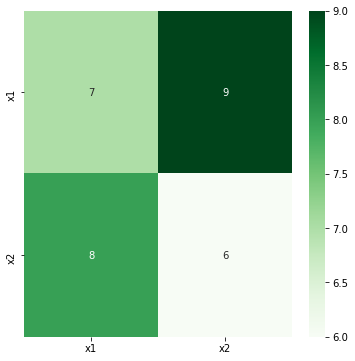

      -Fronteiras de Separação do Classificador-


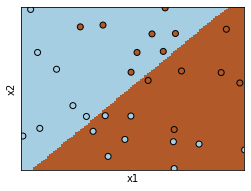

In [ ]:
print("----------------REGRESSAO LOGISTICA----------------")
f_RLGD.fit(x_train, y_train)
y_test_predict = f_RLGD.predict(x_teste)
print('Acurácia: {}'.format(f_acuracia(y_teste, y_test_predict)))
print("               -MATRIZ DE CONFUSÃO-")
plot_confusion_matrix_(x_teste, y_teste, f_RLGD)
print("      -Fronteiras de Separação do Classificador-")
plot_boundaries(x_teste, y_teste, f_RLGD)


----------------Naive Bayes Gaussiano----------------
Acurácia: 0.8666666666666667
               -MATRIZ DE CONFUSÃO-


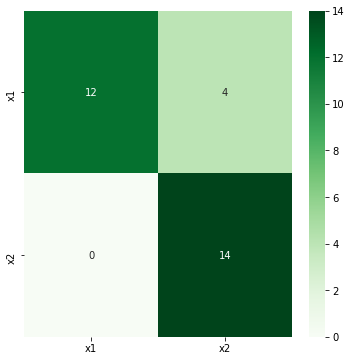

      -Fronteiras de Separação do Classificador-


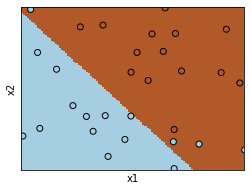

In [ ]:
print("----------------Naive Bayes Gaussiano----------------")
f_NBG.fit(x_train, y_train)
y_test_predict = f_NBG.predict(x_teste)
print('Acurácia: {}'.format(f_acuracia(y_teste, y_test_predict)))
print("               -MATRIZ DE CONFUSÃO-")
plot_confusion_matrix_(x_teste, y_teste, f_NBG)
print("      -Fronteiras de Separação do Classificador-")
plot_boundaries(x_teste, y_teste, f_NBG)


------------Discriminante Quadrático Gaussiano-------------
Acurácia: 0.8666666666666667
               -MATRIZ DE CONFUSÃO-


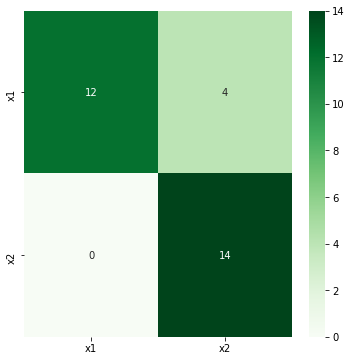

      -Fronteiras de Separação do Classificador-


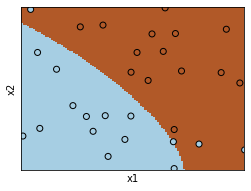

In [ ]:
print("------------Discriminante Quadrático Gaussiano-------------")
f_DQG.fit(x_train, y_train)
y_test1_predict = f_DQG.predict(x_teste)
print('Acurácia: {}'.format(f_acuracia(y_teste, y_test1_predict)))
print("               -MATRIZ DE CONFUSÃO-")
plot_confusion_matrix_(x_teste, y_teste, f_DQG)
print("      -Fronteiras de Separação do Classificador-")
plot_boundaries(x_teste, y_teste, f_DQG)

**2. O dado parece se linearmente separável ou não?**

Sim, os dados são linearmente separáveis.

**3. Quais dos métodos produziu fronteiras lineares?**

A regressão logística e o naive bayes gaussiano.

**4. Qual teve melhor acurácia?**

O Naive Bayes Gaussiano obteve o melhor valor de acurácia, e o  Discriminante Quadrático Gaussiano teve valores bem aproximados.